In [1]:
import scipy.stats as stats
import geopandas as gpd
import numpy as np
from numpy import arange
from fs import methods as m
from fs import model as ml
import ipywidgets as widgets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, clear_output
from sklearn import preprocessing
import os
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import AppLayout, Layout
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

KNN = True

RESOLUTION = '0_1'
SENSOR = 'pm25_st'
geopackages = os.listdir('assets/grids_'+RESOLUTION)


old size  new size
28 173
29 180
28 175
28 173
28 173


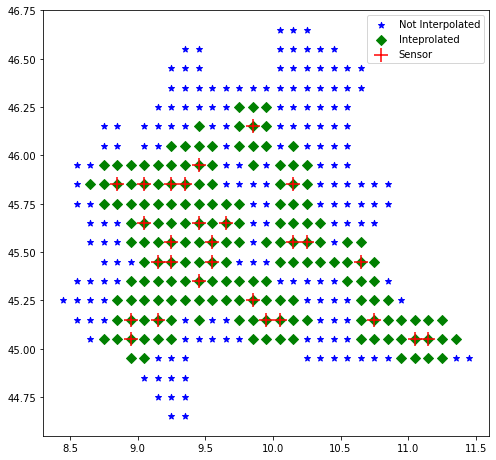

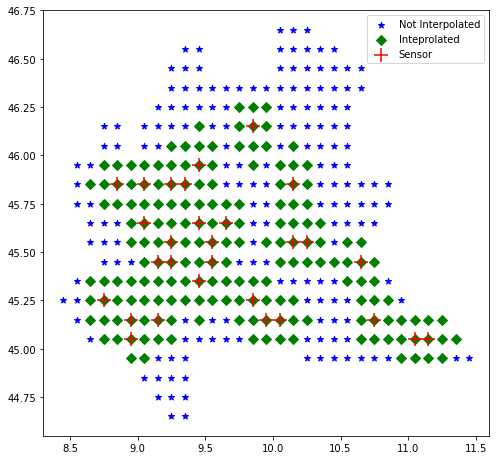

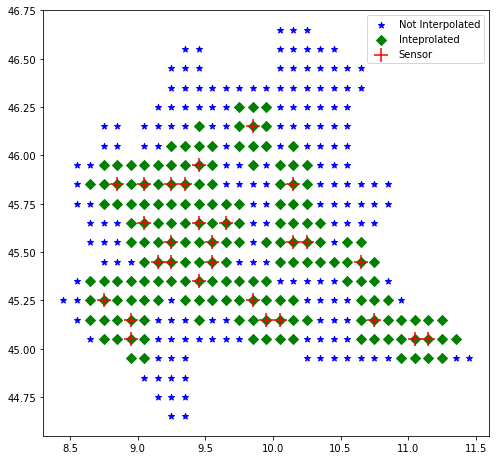

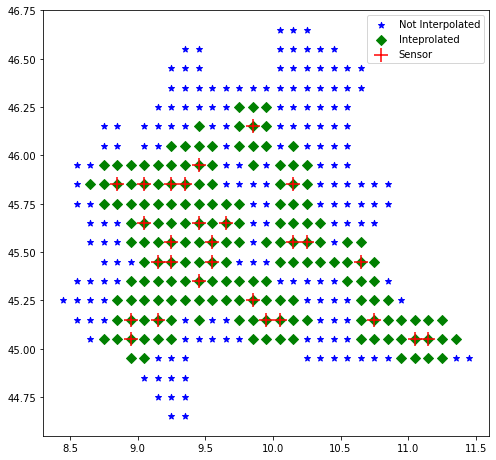

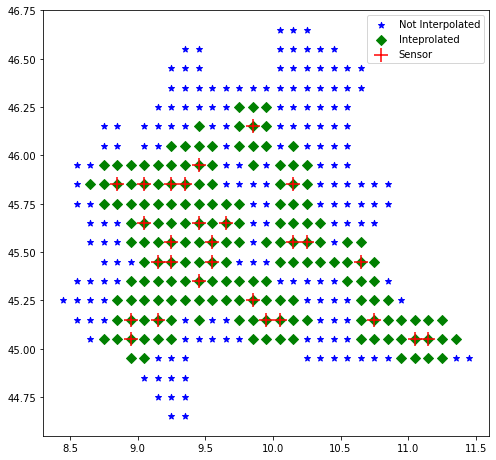

In [16]:
print('old size  new size')

for grid in geopackages:
    
    data = gpd.read_file('assets/grids_'+RESOLUTION+'/'+ grid)
    points_st = data[~data['pm25_st'].isnull()]

    data_filtered = data[data['pm25_st'].isnull()]

    results = m.add_buffer(points_st, data, data, 10, 'pm25')
    results = results[~results['pm25_st'].isnull()].dropna(axis=1)

    
    
    centr_filtered = data_filtered[['lng_cen','lat_cen']]
    geometry_filtered = [Point(xy) for xy in zip(data_filtered['lng_cen'], data_filtered['lat_cen'])]

    cent_filtered_df = gpd.GeoDataFrame(centr_filtered,
                              crs = "EPSG:4326",
                              geometry = geometry_filtered)

    fig, ax = plt.subplots(figsize=(8, 8))

    cent_filtered_df.plot(ax=ax, marker='*', color='blue', markersize=40, legend=True, 
                              label= "Not Interpolated")
    
    centr_st = points_st[['lng_cen','lat_cen']]
    geometry_st = [Point(xy) for xy in zip(centr_st['lng_cen'], centr_st['lat_cen'])]


    cent_st_df = gpd.GeoDataFrame(centr_st,
                              crs = "EPSG:4326",
                              geometry = geometry_st)

    print(points_st.shape[0], results.shape[0])

    centr_results = results[['lng_cen','lat_cen']]
    geometry_results = [Point(xy) for xy in zip(results['lng_cen'], results['lat_cen'])]

    results_df = gpd.GeoDataFrame(centr_results,
                              crs = "EPSG:4326",
                              geometry = geometry_results)
    results_df.plot(ax=ax, marker='D', color='green', markersize=50, legend=True, 
                    label = "Inteprolated");
 
    cent_st_df.plot(ax=ax, marker='+', color='red', markersize=190, legend=True, 
                    label = "Sensor");
    ax.legend()

    
    
    

### 